In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

## Run this at the end for survey data

In [6]:
unique_titles = len(nodups)
total_ratings = len(dfwr['user_rating'])
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()

#users_without_ratings = 
df.head()

NameError: name 'nodups' is not defined

In [32]:
data = np.load('src/data/datacln.npy', allow_pickle = True)

df = pd.DataFrame(data, columns = ['title','author', 'isbn', 'book_type', 'pages', 'userid', 'user_rating', 'num_rate', 'av_rate'])  

#get rid of any users who haven't added any books, and any added books with no user rating
dfwr = df.dropna(axis=0)
actually_rated = dfwr['user_rating'] != 0
dfwr = dfwr[actually_rated]
#dfwr.info()
#dfwr.head()
dfwr.tail()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
82692,Twilight: The Complete Illustrated Movie Compa...,"Vaz, Mark Cotta",9780316043137,format,144,95715431,4,328573,4.24
82693,Sorcery of Thorns,"Rogerson, Margaret",9781481497619,format,456,95715431,2,22646,4.16
82694,The Steward,"Shields, Christopher",,format,336,95715431,1,543,3.93
82717,Ayah Menyayangi Tanpa Akhir,"Kejora, Kirana",9786027735460,format,372,45343307,4,250,3.84
82720,The Lightning Thief,"Riordan, Rick",9780786838653,format,377,68162066,5,1803760,4.25


In [8]:


users = df.drop_duplicates(subset='userid', keep='first', inplace=False)
mask = users['userid'=='None']
users[mask]

KeyError: False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82722 entries, 0 to 82721
Data columns (total 9 columns):
title          78448 non-null object
author         78448 non-null object
isbn           78448 non-null object
book_type      78448 non-null object
pages          75024 non-null object
userid         82722 non-null object
user_rating    78448 non-null object
num_rate       78448 non-null object
av_rate        78448 non-null object
dtypes: object(9)
memory usage: 5.7+ MB


In [10]:
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()
nodups

NameError: name 'nodups' is not defined

In [5]:
df.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
0,None,None,None,None,None,7171593,None,None,None
1,None,None,None,None,None,6060131,None,None,None
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77


In [6]:
from sqlalchemy import create_engine
import psycopg2 
import io

In [8]:
ratings = dfwr['user_rating']

av_rate presumably has some duplicates because of books read by more than one user. So lets sort those out. 

In [15]:
dfwr[['title', 'av_rate']].sort_values('title')

,title,av_rate
27312,"""A Problem from Hell"": America and the Age of ...",4.22
15336,"""B"" Is for Betsy",4.03
1370,"""B"" Is for Betsy",4.03
35338,"""C"" Is For Corpse",3.91
18211,"""Multiplication Is for White People"": Raising ...",4.14
...,...,...
768,百千さん家のあやかし王子 12 [Momochi-san Chi no Ayakashi O...,4.18
743,盾の勇者の成り上がり 11,4.11
516,青鸟书店（一部关于记忆与慰藉的书店史诗，触痛每个人内心深处的脆弱与柔软）,5
14224,나의 투쟁 1,4.08


In [19]:
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()


In [41]:
df.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
0,None,None,None,None,None,7171593,None,None,None
1,None,None,None,None,None,6060131,None,None,None
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77


## make a quintile ranking for all books based on their average rating

so, first we have to duplicate all rows where more than one person has rated the same book, because that over-weights the ratings of books that multiple users sampled had rated. Then we toss that into this disgusting histogram and complain about it in results

In [4]:
quin = dfwr.drop_duplicates(subset='title', keep='first', inplace=False)
nums = quin['av_rate']
test = nums.quantile([.94])

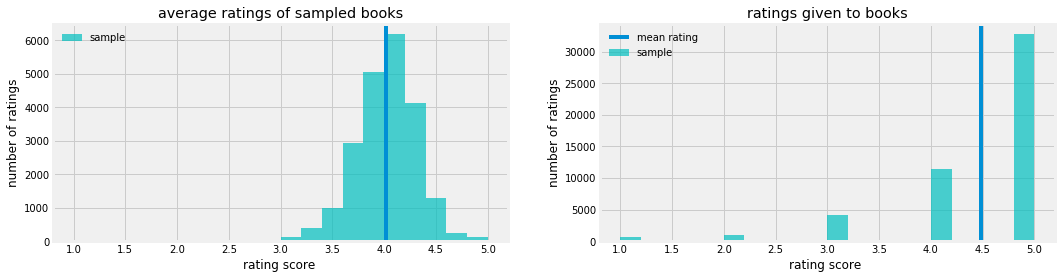

In [38]:
av_rate = quin['av_rate']
av_user_rating = dfwr['user_rating']

# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
#null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots(1, 2, figsize = (16,4))

#ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax[0].hist(av_rate, color = 'c', bins = 20, alpha = .7, label ='sample')

ax[0].set_title('average ratings of sampled books')
ax[0].set_ylabel('number of ratings')
ax[0].set_xlabel('rating score ')
ax[0].axvline(np.mean(av_rate))

ax[0].legend(loc='upper left', frameon = False)

ax[1].hist(av_user_rating, color = 'c', bins = 20, alpha = .7, label ='sample')

ax[1].set_title('ratings given to books')
ax[1].set_ylabel('number of ratings')
ax[1].set_xlabel('rating score ')
ax[1].axvline(np.mean(av_user_rating), label = "mean rating")

ax[1].legend(loc='upper left', frameon = False)


#fig.xlabel('number of ratings')
plt.show()
#fig.xlabel('number of ratings')


#fig.savefig('img/simpsons_paradox', dpi = 300, bbox_inches = 'tight', transparent = True)

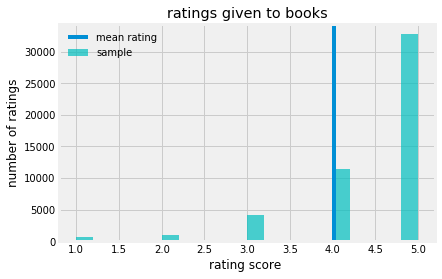

In [31]:
# histogram of user ratings

av_user_rating = dfwr['user_rating']
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
#null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots()

#ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax.hist(av_user_rating, color = 'c', bins = 20, alpha = .7, label ='sample')

ax.set_title('ratings given to books')
ax.set_ylabel('number of ratings')
ax.set_xlabel('rating score ')
ax.axvline(np.mean(av_rate), label = "mean rating")

ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/results_of_individual_ratings', dpi = 300, bbox_inches = 'tight', transparent = True)

Simpson's paradox



In [18]:
quin.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77
5,Good Omens: The Nice and Accurate Prophecies o...,"Pratchett, Terry",,format,491,22197300,5,476232,4.25
6,The Host,"Meyer, Stephenie",9780316068048,format,620,22197300,5,848921,3.84


In [13]:
#dir(test)

In [7]:
x = 1
quants = []
while x > 0:
    x-=.01
    quants.append(nums.quantile(x))

ValueError: percentiles should all be in the interval [0, 1]. Try -7.528699885739343e-18 instead.

In [6]:
x = 2
x - 1

x

2

In [26]:
quants[1] ,quants[20], quants[40], quants[60], quants[80], quants[98]

(4.54, 4.21, 4.06, 3.92, 3.74, 3.15)

In [16]:
quin[(quin['av_rate'] < 3.1) & (dfwr['num_rate'] > 1) ]

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
186,"Revolution 2020: Love, Corruption, Ambition","Bhagat, Chetan",9788129118806,format,296,50941109,4,52277,3.09
188,One Night at the Call Center,"Bhagat, Chetan",9780345498328,format,320,50941109,4,51389,2.5
604,Four Blondes,"Bushnell, Candace",9780802138255,format,256,9968410,5,24443,2.82
1793,The Rose Labyrinth,"Hardie, Titania",9780755344567,format,400,8991146,5,3002,2.92
2564,Welcome to Scranton,"Halpin, Greg",,format,152,41384409,3,148,2.88
...,...,...,...,...,...,...,...,...,...
76575,Mörkrädd,"Roman, Andreas",,format,256,24706560,3,189,2.96
77991,Irresistible: Libro 1,"Hill, Robyn",,format,294,50397312,3,212,3.08
79013,Mara,"Slavici, Ioan",9789735570897,format,242,84155016,2,4459,3.06
79181,خمسة خصوصي,"حسن, علي",9789776471214,format,160,64474380,1,108,2.22


AttributeError: 'Series' object has no attribute 'info'

In [24]:
for names in bad_books:
    print(names)

Revolution 2020: Love, Corruption, Ambition
One Night at the Call Center
Four Blondes
Awakening
書呆子的反抗：為什麼你以為對的都是錯的？
The Rose Labyrinth
Welcome to Scranton
Tell It Like it Is! (Text with 2 DVD's): Natural Chinese for Advanced Learners
Leggende sarde
Christian Doctrine
Drug Trafficking, Corruption and States: How Illicit Networks Shaped Institutions in Colombia, Guatemala and Mexico
Glamour: Fashion, Industrial Design, Architecture
Full Frontal Fashion: The Insider's Guide to High Style in Every Situation
Stylemakers: Inside Fashion
The Continuity Girl
Le Divorce
The Conservative's Guide To Understanding Our Friends The Liberals
Extreme Breakup Recovery
How to Build a Fortune [With CD-ROM with Workbook and Trump Cards and DVD]
Quotable Michael Jordan: Words of Wit, Wisdom, and Inspiration by and about Michael Jordan, Basketball's Greatest Superstar
The Manny
L'Affaire
Dreaming in Hindi: Coming Awake in Another Language
Des mots en images
Now You See Him
The Emperor's Children
MRI Physic